# Analisis de las Películas Más Taquilleras del Cine Presencial desde el 2000 hasta el 2024

Fuente del Dataset: https://www.kaggle.com/datasets/aditya126/movies-box-office-dataset-2000-2024

# Importaciones de **Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import kagglehub

# Importacion del Dataset

In [ ]:
ruta = kagglehub.dataset_download("aditya126/movies-box-office-dataset-2000-2024")
path = "/kaggle/input/movies-box-office-dataset-2000-2024/enhanced_box_office_data(2000-2024)u.csv"
df = pd.read_csv(path)

Using Colab cache for faster access to the 'movies-box-office-dataset-2000-2024' dataset.


In [ ]:
df

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,196,Devara Part 1,7361414.0,5600000.0,76.1,1761414.0,23.9,2024,"Action, Drama",7.0/10,30.0,te,India
4996,197,Kolpaçino 4 4'lük,7343114.0,0.0,0.0,7343114.0,100.0,2024,Comedy,4.0/10,4.0,tr,Turkey
4997,198,Lim Young Woong: Im Hero the Stadium,7305588.0,0.0,0.0,7305588.0,100.0,2024,"Music, Documentary",0.0/10,0.0,ko,South Korea
4998,199,Yolo,7241561.0,2001584.0,27.6,5239977.0,72.4,2024,"Drama, Comedy, Action",6.3/10,70.0,zh,China


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


#Analisis Exploratorio de la Data

**Columnas del Dataset**

In [ ]:
list(df.head())

['Rank',
 'Release Group',
 '$Worldwide',
 '$Domestic',
 'Domestic %',
 '$Foreign',
 'Foreign %',
 'Year',
 'Genres',
 'Rating',
 'Vote_Count',
 'Original_Language',
 'Production_Countries']

**Cantidad de Filas**

In [ ]:
df.shape[0]

5000

**Cantidad de Registros nulos**

In [ ]:
df_nulos = df.isnull().sum()
df_nulos

,0
Rank,0
Release Group,0
$Worldwide,0
$Domestic,0
Domestic %,0
$Foreign,0
Foreign %,0
Year,0
Genres,178
Rating,170


<Axes: >

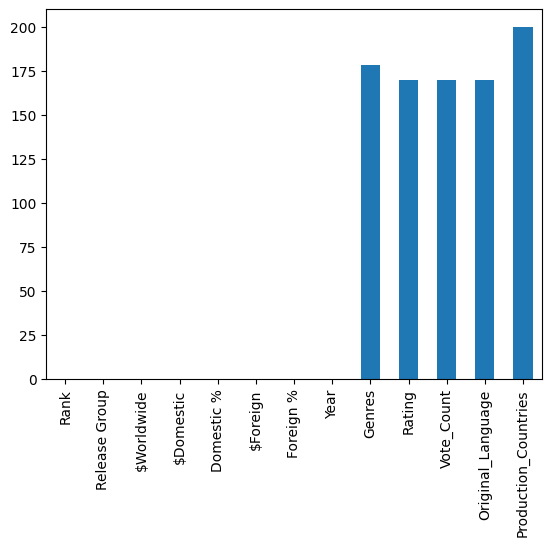

In [ ]:
#grafico de df_nulos
df_nulos.plot(kind='bar')

**Cantidad de registros por año**

In [ ]:
df['Year'].value_counts()

,count
Year,
2000,200
2001,200
2002,200
2003,200
2004,200
2005,200
2006,200
2007,200
2008,200


**Numero de Generos Unicos de peliculas**

In [ ]:
len(df['Genres'].unique())

1318

**Numero de Nombre Peliculas unicas**

In [ ]:
len(df['Release Group'].unique())

4955

**Numero de Nombre Peliculas No unicas**

In [ ]:
len(df[df['Release Group'].duplicated(keep=False)])

88

In [ ]:
#Visualizar cada cazo que se repite
#df[df['Release Group'].duplicated(keep=False)].sort_values(by='Release Group')

**Pelicula con mas ventas**

In [ ]:
df[df['$Worldwide'] == df['$Worldwide'].max()]

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
3800,1,Avengers: Endgame,2.799439e+09,858373000.0,30.7,1.941066e+09,69.3,2019,"Adventure, Science Fiction, Action",8.246/10,25780.0,en,United States of America


**Pelicula con menos venta**

In [ ]:
df[df['$Worldwide'] == df['$Worldwide'].min()]

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
199,200,Girlfight,1666028.0,1565852.0,94.0,100176.0,6.0,2000,Drama,6.3/10,170.0,en,United States of America


# Limpieza de los datos



In [ ]:
df = df.dropna()
df['Genres'] = df['Genres'].astype(str).apply(lambda x: x.split(','))

/tmp/ipython-input-404991716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genres'] = df['Genres'].astype(str).apply(lambda x: x.split(','))


In [ ]:
df['Year'].value_counts().sort_index().reset_index().rename(columns={'index': 'Year', 'Year': 'Cantidad de Películas'})


,Cantidad de Películas,count
0,2000,194
1,2001,193
2,2002,194
3,2003,191
4,2004,195
5,2005,191
6,2006,199
7,2007,199
8,2008,197
9,2009,194


# Visualización

Gráfico de línea de las peliculas con mayor  y menor recaudación

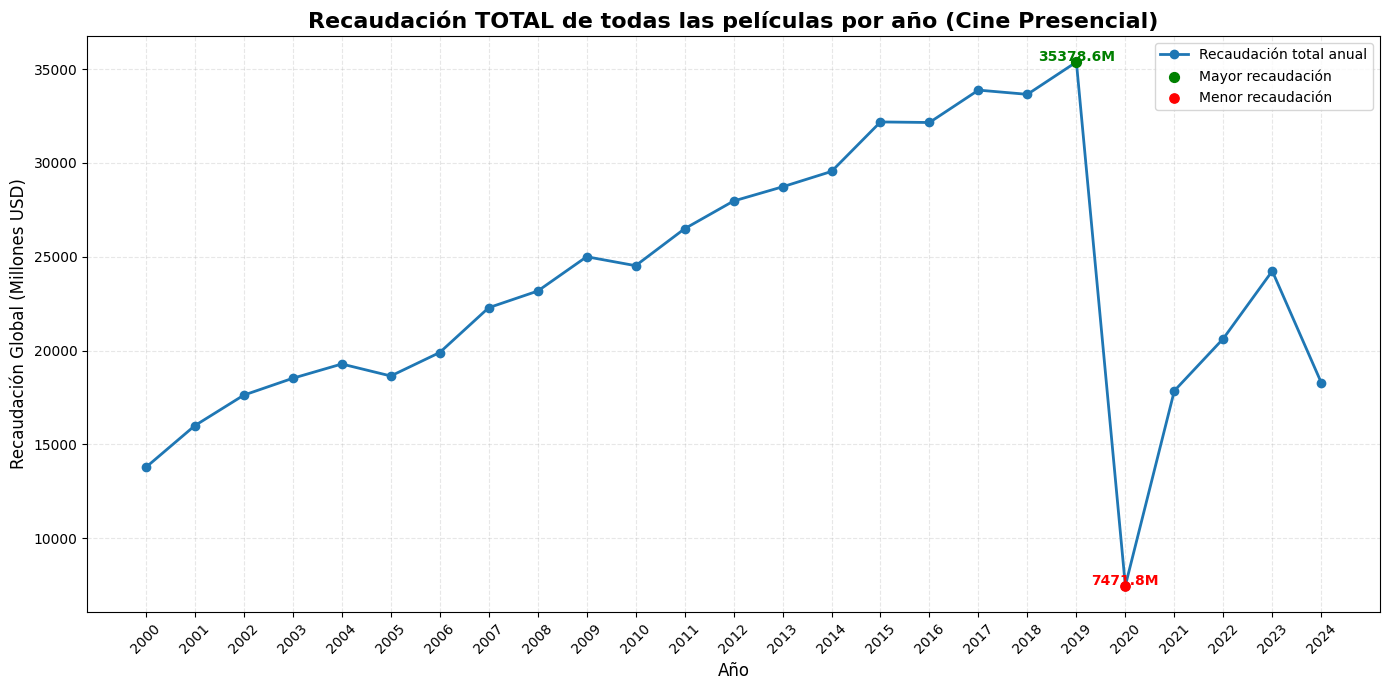

In [ ]:
# Agrupar por año y sumar la recaudación total mundial
revenue_per_year = df.groupby('Year')['$Worldwide'].sum().reset_index()

# Convertir a millones
revenue_per_year['$Worldwide_M'] = revenue_per_year['$Worldwide'] / 1e6

# Encontrar máximo y mínimo
max_point = revenue_per_year.loc[revenue_per_year['$Worldwide'].idxmax()]
min_point = revenue_per_year.loc[revenue_per_year['$Worldwide'].idxmin()]

# Gráfico
plt.figure(figsize=(14,7))
plt.plot(revenue_per_year['Year'], revenue_per_year['$Worldwide_M'],
         marker='o', markersize=6, color='#1f77b4', linewidth=2, label='Recaudación total anual')

# Resaltar máximo y mínimo
plt.scatter(max_point['Year'], max_point['$Worldwide_M'], color='green', s=50, zorder=5, label='Mayor recaudación')
plt.scatter(min_point['Year'], min_point['$Worldwide_M'], color='red', s=45, zorder=5, label='Menor recaudación')

# Etiquetas
plt.text(max_point['Year'], max_point['$Worldwide_M'] + 50, f"{max_point['$Worldwide_M']:.1f}M",
         color='green', fontsize=10, weight='bold', ha='center')
plt.text(min_point['Year'], min_point['$Worldwide_M'] + 30, f"{min_point['$Worldwide_M']:.1f}M",
         color='red', fontsize=10, weight='bold', ha='center')

plt.title("Recaudación TOTAL de todas las películas por año (Cine Presencial)", fontsize=16, weight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Recaudación Global (Millones USD)", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(revenue_per_year['Year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Gráfico de barra mostrando la película con mayor y la película con menor recaudación

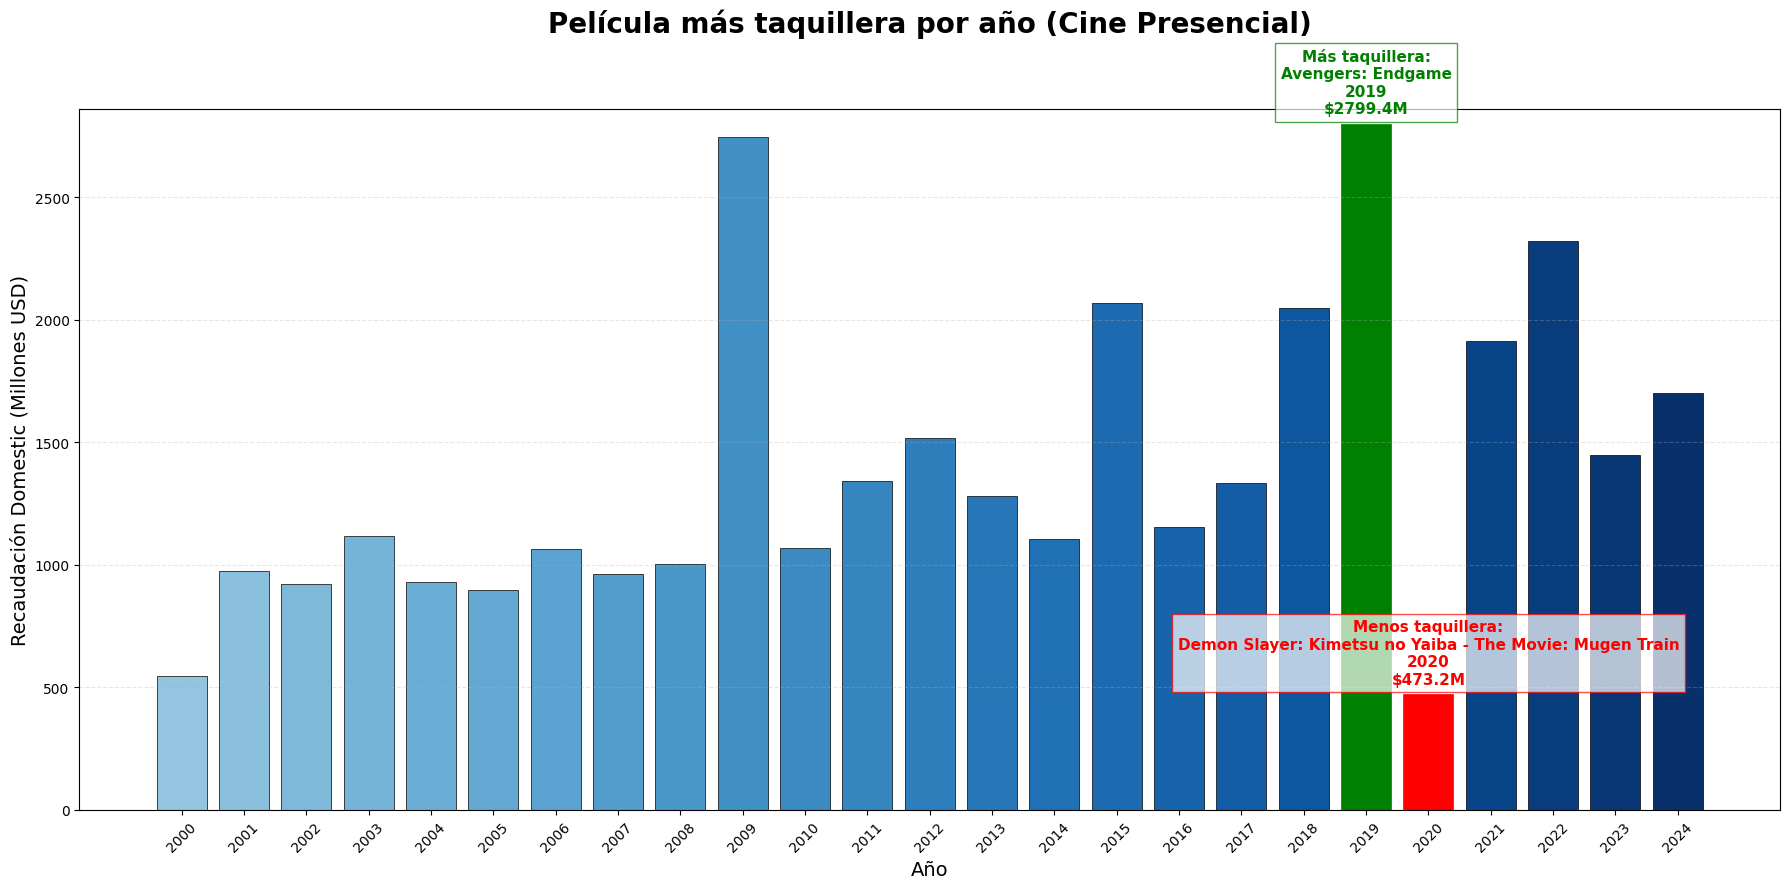

In [ ]:
# Película más taquillera por año
top_movies = df.loc[df.groupby('Year')['$Worldwide'].idxmax()].sort_values('Year').reset_index(drop=True)

# Película más taquillera de todo el periodo
most_movie = top_movies.loc[top_movies['$Worldwide'].idxmax()]

# Película menos taquillera de todo el periodo
least_movie = top_movies.loc[top_movies['$Worldwide'].idxmin()]
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_movies)))

plt.figure(figsize=(18,9))
bars = plt.bar(top_movies['Year'], top_movies['$Worldwide']/1e6, color=colors, edgecolor='black', linewidth=0.5)

bars[top_movies['$Worldwide'].idxmax()].set_color('green')
bars[top_movies['$Worldwide'].idxmin()].set_color('red')


plt.ylim(0, top_movies['$Worldwide'].max()/1e6 + 60)
plt.text(most_movie['Year'], most_movie['$Worldwide']/1e6 + 30,
         f"Más taquillera:\n{most_movie['Release Group']}\n{most_movie['Year']}\n${most_movie['$Worldwide']/1e6:.1f}M",
         color='green', fontsize=11, weight='bold', ha='center', va='bottom',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='green'))

plt.text(least_movie['Year'], least_movie['$Worldwide']/1e6 + 30,
         f"Menos taquillera:\n{least_movie['Release Group']}\n{least_movie['Year']}\n${least_movie['$Worldwide']/1e6:.1f}M",
         color='red', fontsize=11, weight='bold', ha='center', va='bottom',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='red'))

plt.title("Película más taquillera por año (Mundial)", fontsize=20, weight='bold', pad=55)  # pad aumenta espacio del título
plt.xlabel("Año", fontsize=14)
plt.ylabel("Recaudación Domestic (Millones USD)", fontsize=14)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(top_movies['Year'], rotation=45)
plt.tight_layout()
plt.show()


Gráfico de pastel mostrando los géneros de las películas más taquilleras

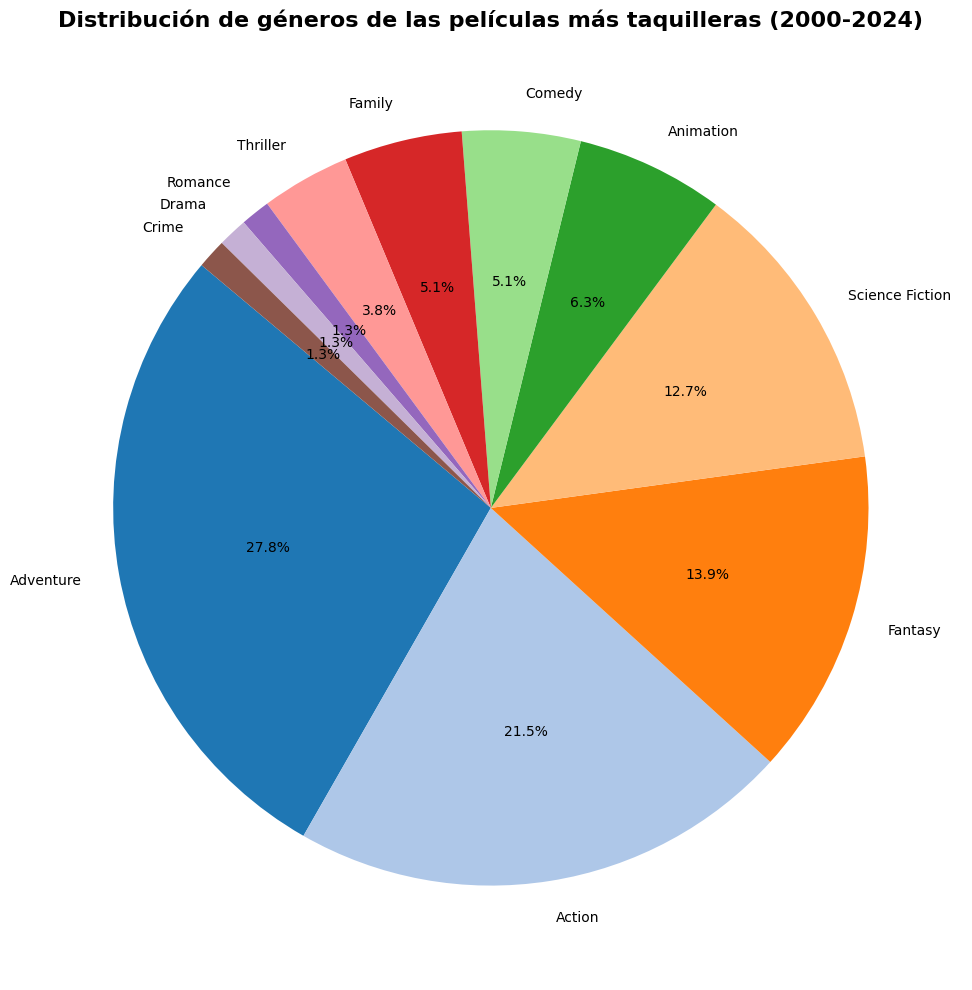

In [ ]:




# Película más taquillera por año
top_movies = df.loc[df.groupby('Year')['$Worldwide'].idxmax()].sort_values('Year').reset_index(drop=True)

genre_counts = (
    top_movies['Genres']
    .explode()          # Desarma las listas en filas individuales
    .str.strip()        # Limpia espacios por si acaso
    .value_counts()     # Cuenta cada género
)

plt.figure(figsize=(10,10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize':10})
plt.title("Distribución de géneros de las películas más taquilleras (2000-2024)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


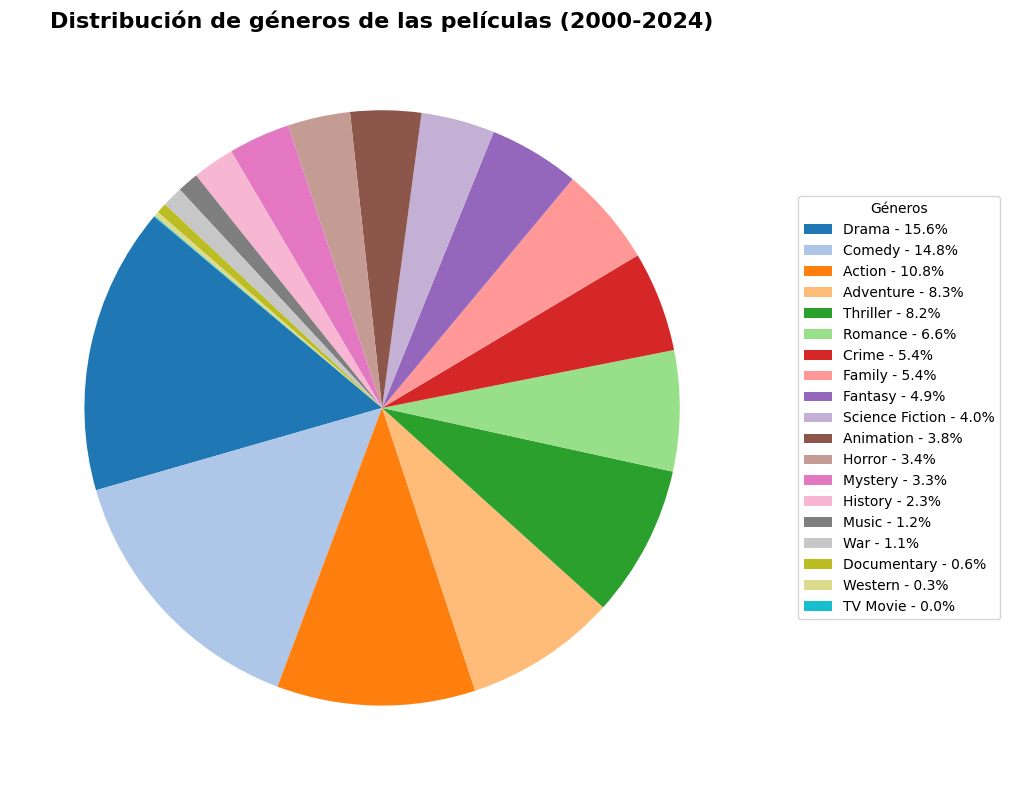

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(genre_counts, startangle=140, colors=plt.cm.tab20.colors)  # Sin porcentajes

# Leyenda con porcentajes incluidos
labels = [f"{genre} - {count/sum(genre_counts)*100:.1f}%" for genre, count in genre_counts.items()]
plt.legend(labels, title="Géneros", loc="center left", bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.title("Distribución de géneros de las películas (2000-2024)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
df_genres = df[['Genres', '$Worldwide']].explode('Genres')
df_genres['Genres'] = df_genres['Genres'].str.strip()
# Agrupar por género y calcular desviación estándar
genre_std = df_genres.groupby('Genres')['$Worldwide'].std().sort_values()
most_stable_genre = genre_std.idxmin()
lowest_std = genre_std.min()

print(f"El género con la recaudación más estable es '{most_stable_genre}' con desviación estándar de {lowest_std:,.0f} USD")
genre_std.head(5)


El género con la recaudación más estable es 'TV Movie' con desviación estándar de 7,339,793 USD


,$Worldwide
Genres,
TV Movie,7.339793e+06
Documentary,4.730024e+07
Horror,8.850189e+07
Mystery,1.098116e+08
History,1.131545e+08
